<a href="https://colab.research.google.com/github/vkquests/Sales_Analysis/blob/main/sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Analysis

In this project, I harness the power of Pandas and Matplotlib to delve into a treasure trove of sales data spanning an entire year. This dataset encompasses a vast array of electronics store transactions, including details such as product categories, costs, purchase addresses, and more. Together, we'll uncover insights, address business questions, and unveil the story hidden within this extensive sales data.

**Business Questions**  
Throughout this analysis, we aim to answer the following key business questions:

1. What was the best month for sales, and how much was earned during that month?
2. Which city had the highest product sales?
3. What is the optimal time for displaying advertisements to maximize the likelihood of customers buying products?
4. Which products are most frequently sold together?
5. Which product had the highest sales, and why do you think it achieved that?


# Data Analysis and Code Implementation

Import required libraries

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

Merging 12 months of sales data into a single file

In [2]:
# Concatenate multiple CSV files into a single DataFrame
df = pd.concat(map(pd.read_csv, glob.glob('/content/*.csv')))

# Check the shape (number of rows and columns) of the DataFrame
df.shape

(186850, 6)

Reading the updated dataframe

In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


## Data Cleaning

Removing Headers that got added during csv file append operation

In [4]:
df[df['Order ID'] == 'Order ID']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
964,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
973,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
975,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1318,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1355,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [5]:
# Remove rows with header or invalid data
df = df[df['Order ID'] != 'Order ID']
df.shape

(186495, 6)

In [6]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


Checking NAN

In [7]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

Removing NAN's

In [8]:
# Display rows in the DataFrame where there are missing values (NaNs)
df[df.isna()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
11681,NaN,NaN,NaN,NaN,NaN,NaN
11682,NaN,NaN,NaN,NaN,NaN,NaN
11683,NaN,NaN,NaN,NaN,NaN,NaN
11684,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df=df.dropna()
df.shape

(185950, 6)

Checking for Null

In [10]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [11]:
# Count the number of duplicate rows in the DataFrame
duplicates = df.duplicated()
duplicates.sum()



264

In [12]:
# Display rows in the DataFrame that are duplicates
df[duplicates]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1007,195045,Wired Headphones,1,11.99,05/24/19 02:22,"95 Jefferson St, Atlanta, GA 30301"
1277,195299,Lightning Charging Cable,1,14.95,05/30/19 19:33,"237 North St, Dallas, TX 75001"
2464,196429,AAA Batteries (4-pack),1,2.99,05/30/19 17:30,"966 11th St, New York City, NY 10001"
3948,197845,USB-C Charging Cable,1,11.95,05/09/19 15:23,"95 Willow St, Dallas, TX 75001"
4660,198514,USB-C Charging Cable,1,11.95,05/13/19 18:56,"171 Jackson St, Seattle, WA 98101"
...,...,...,...,...,...,...
9776,257530,USB-C Charging Cable,1,11.95,09/03/19 11:13,"192 Johnson St, San Francisco, CA 94016"
11009,258715,Lightning Charging Cable,1,14.95,09/15/19 16:50,"550 10th St, Portland, OR 97035"
11344,259035,27in FHD Monitor,1,149.99,09/29/19 13:52,"327 Lake St, San Francisco, CA 94016"
11618,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [13]:
df=df.drop_duplicates()
df.shape

(185686, 6)

## Data Transformation

Changing datatype of columns **Quantity Ordered** and **Price Each** from string to int and float respectively

In [14]:
# Convert 'Quantity Ordered' column to integer data type
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)

# Convert 'Price Each' column to float data type
df['Price Each'] = df['Price Each'].astype(float)

<ipython-input-14-9d5442b1c7d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
<ipython-input-14-9d5442b1c7d6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each'] = df['Price Each'].astype(float)


Extracting month from date

In [15]:
# Extract the month portion (first two characters) from the 'Order Date' column
df['Month'] = df['Order Date'].str[0:2]

# Convert the 'Month' column to numeric data type (int)
df['Month'] = pd.to_numeric(df['Month'])

df.head()

<ipython-input-15-19b98cf07d57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Order Date'].str[0:2]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5


In [16]:
#Achieved using Datetime
#df['Time_hr'] = df['Order Date'].str[-5:-3]
#df['Time_hr']

Using DateTime to extract month and hour (alternate method)

In [17]:
# Convert the 'Order Date' column to datetime data type ...Takes some time to run
df['Order_Date_DT'] = pd.to_datetime(df['Order Date'])

# Extract the month from the 'Order_Date_DT' column...use 'month' not 'Month'
df['Month_DT'] = df['Order_Date_DT'].dt.month

# Extract the hour from the 'Order_Date_DT' column...
df['Hour'] = df['Order_Date_DT'].dt.hour #use hour not Hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Order_Date_DT,Month_DT,Hour
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,2019-05-16 17:14:00,5,17
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,2019-05-19 14:43:00,5,14
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,2019-05-24 11:36:00,5,11
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,2019-05-02 20:40:00,5,20
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,2019-05-11 22:55:00,5,22


Extracting city name and state -> city (state)

---



In [18]:
# Extract the city and state information from the 'Purchase Address' column
# WE have 2 different cities with name Portland so adding State name to City
#1st part of split gets the city name and 2nd part the (state){has state and pin space separated}
#df['City']=df['Purchase Address'].str.split(',').str.get(1).str.strip() -- using str
#df['City']= df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())  # does same thing as above without using str

df['City']= df['Purchase Address'].apply(lambda x: f"{x.split(',')[1].strip()} ({x.split(',')[2].split(' ')[1].strip()})")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Order_Date_DT,Month_DT,Hour,City
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,2019-05-16 17:14:00,5,17,New York City (NY)
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,2019-05-19 14:43:00,5,14,Dallas (TX)
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,2019-05-24 11:36:00,5,11,New York City (NY)
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,2019-05-02 20:40:00,5,20,Dallas (TX)
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,2019-05-11 22:55:00,5,22,Seattle (WA)


## Data Exploration and Data Visualization

### Question 1: What was the best month for sales, and how much was earned during that month?

Creating a new column *Total_Price* to calculate the sales data

In [19]:
df['Total_Price'] = df['Quantity Ordered']*df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Order_Date_DT,Month_DT,Hour,City,Total_Price
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,2019-05-16 17:14:00,5,17,New York City (NY),11.99
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,2019-05-19 14:43:00,5,14,Dallas (TX),3.84
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,2019-05-24 11:36:00,5,11,New York City (NY),149.99
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,2019-05-02 20:40:00,5,20,Dallas (TX),11.99
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,2019-05-11 22:55:00,5,22,Seattle (WA),5.98


In [20]:
# Group the DataFrame by 'Month' and calculate the sum of numeric columns within each group
df.groupby('Month').sum()

<ipython-input-20-40bd6d170fb0>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Month').sum()


,Quantity Ordered,Price Each,Month_DT,Hour,Total_Price
Month,,,,,
1,10893,1810924.81,9699,139339,1821413.16
2,13431,2186940.38,23914,172392,2200078.08
3,16979,2789084.64,45384,218622,2804973.35
4,20536,3366218.76,73028,261916,3389217.98
5,18653,3133134.61,82760,238580,3150616.23
6,15234,2560503.50,81210,195223,2576280.15
7,16054,2631225.12,99925,205909,2646461.32
8,13429,2226963.90,95544,172049,2241083.37
9,13091,2081897.65,104427,168206,2094465.69


In [21]:
#Sum of Total Sales for each month
df_sales = df.groupby('Month')['Total_Price'].sum()
df_sales

Month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: Total_Price, dtype: float64

Sorting values

In [22]:
# Sort the 'df_sales' Series in descending order (highest to lowest total sales)
df_sales = df_sales.sort_values(ascending=False)
df_sales

Month
12    4608295.70
10    3734777.86
4     3389217.98
11    3197875.05
5     3150616.23
3     2804973.35
7     2646461.32
6     2576280.15
8     2241083.37
2     2200078.08
9     2094465.69
1     1821413.16
Name: Total_Price, dtype: float64

Plotting sales vs months

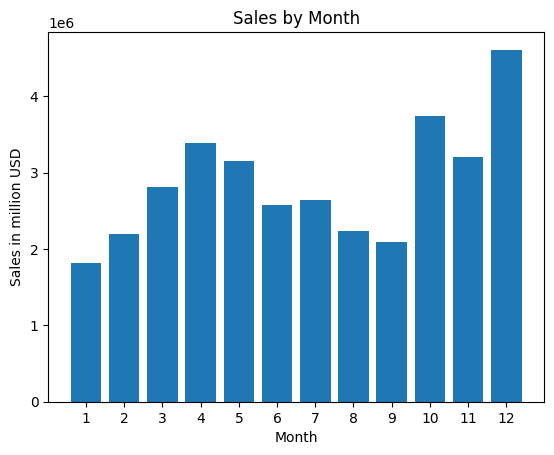

In [23]:
# Create a bar plot for total sales by month
plt.bar(df_sales.index, df_sales.values)

# Set the x-axis ticks to correspond to the months
plt.xticks(df_sales.index)

# Label the x-axis with 'Month'
plt.xlabel('Month')

# Label the y-axis with 'Sales in million USD'
plt.ylabel('Sales in million USD')

# Set the title of the plot
plt.title('Sales by Month')

# Display the plot
plt.show()


### Question 2: Which city had the highest product sales?

In [24]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Order_Date_DT,Month_DT,Hour,City,Total_Price
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,2019-05-16 17:14:00,5,17,New York City (NY),11.99
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,2019-05-19 14:43:00,5,14,Dallas (TX),3.84
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,2019-05-24 11:36:00,5,11,New York City (NY),149.99
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,2019-05-02 20:40:00,5,20,Dallas (TX),11.99
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,2019-05-11 22:55:00,5,22,Seattle (WA),5.98


In [25]:
#Sum of Total Sales by city
df_sales_by_city=df.groupby('City')['Total_Price'].sum()
df_sales_by_city

City
Atlanta (GA)          2794199.07
Austin (TX)           1818044.33
Boston (MA)           3658627.65
Dallas (TX)           2765373.96
Los Angeles (CA)      5448304.28
New York City (NY)    4661867.14
Portland (ME)          449321.38
Portland (OR)         1870010.56
San Francisco (CA)    8254743.55
Seattle (WA)          2745046.02
Name: Total_Price, dtype: float64

In [26]:
# Sort the 'df_sales_by_city' Series in Ascending order
df_sales_by_city_sorted=df_sales_by_city.sort_values()
df_sales_by_city_sorted

City
Portland (ME)          449321.38
Austin (TX)           1818044.33
Portland (OR)         1870010.56
Seattle (WA)          2745046.02
Dallas (TX)           2765373.96
Atlanta (GA)          2794199.07
Boston (MA)           3658627.65
New York City (NY)    4661867.14
Los Angeles (CA)      5448304.28
San Francisco (CA)    8254743.55
Name: Total_Price, dtype: float64

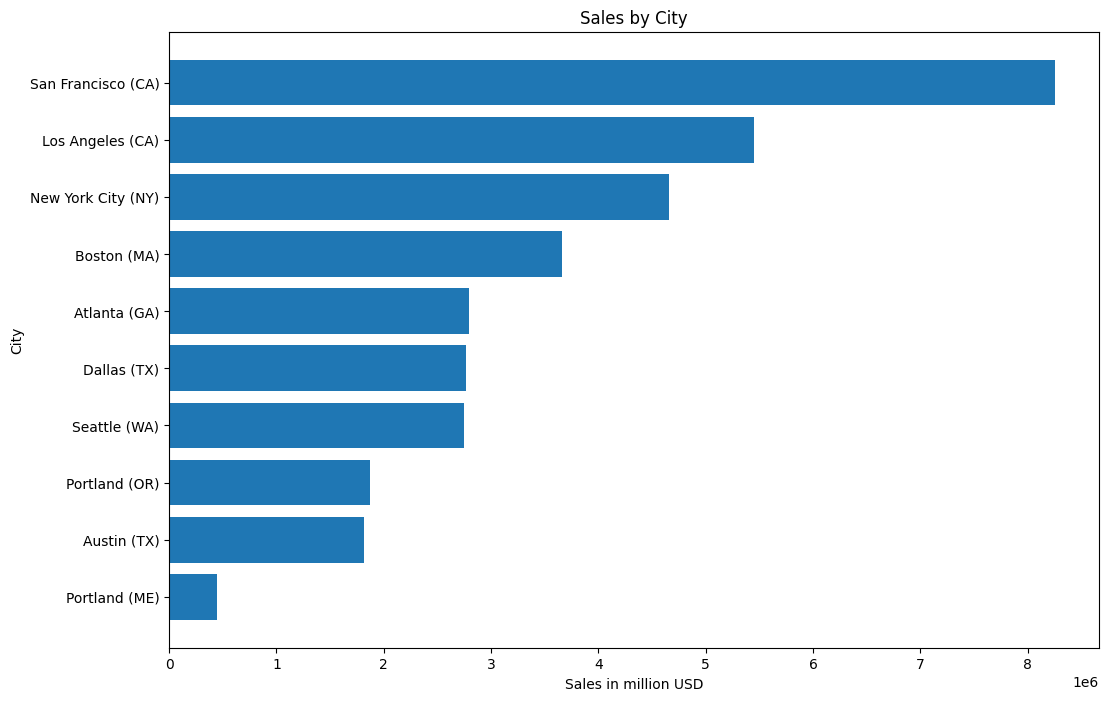

In [27]:
plt.figure(figsize=(12, 8))

# Create a horizontal bar chart using df_sales_by_city_sorted data
# The index represents the cities, and values represent sales amounts
plt.barh(df_sales_by_city_sorted.index, df_sales_by_city_sorted.values)

plt.xlabel('Sales in million USD')
plt.ylabel('City')
plt.title('Sales by City')
plt.show()

### Question 3: What is the optimal time for displaying advertisements to maximize the likelihood of customers buying products?

In [28]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Order_Date_DT,Month_DT,Hour,City,Total_Price
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,2019-05-16 17:14:00,5,17,New York City (NY),11.99
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,2019-05-19 14:43:00,5,14,Dallas (TX),3.84
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,2019-05-24 11:36:00,5,11,New York City (NY),149.99
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,2019-05-02 20:40:00,5,20,Dallas (TX),11.99
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,2019-05-11 22:55:00,5,22,Seattle (WA),5.98


In [29]:
#Count of Quantity Ordered per hour
df_hour_grouped=df.groupby('Hour')['Quantity Ordered'].count()
df_hour_grouped

Hour
0      3902
1      2347
2      1242
3       830
4       852
5      1320
6      2481
7      4002
8      6252
9      8740
10    10929
11    12392
12    12573
13    12115
14    10965
15    10159
16    10359
17    10884
18    12263
19    12886
20    12218
21    10905
22     8808
23     6262
Name: Quantity Ordered, dtype: int64

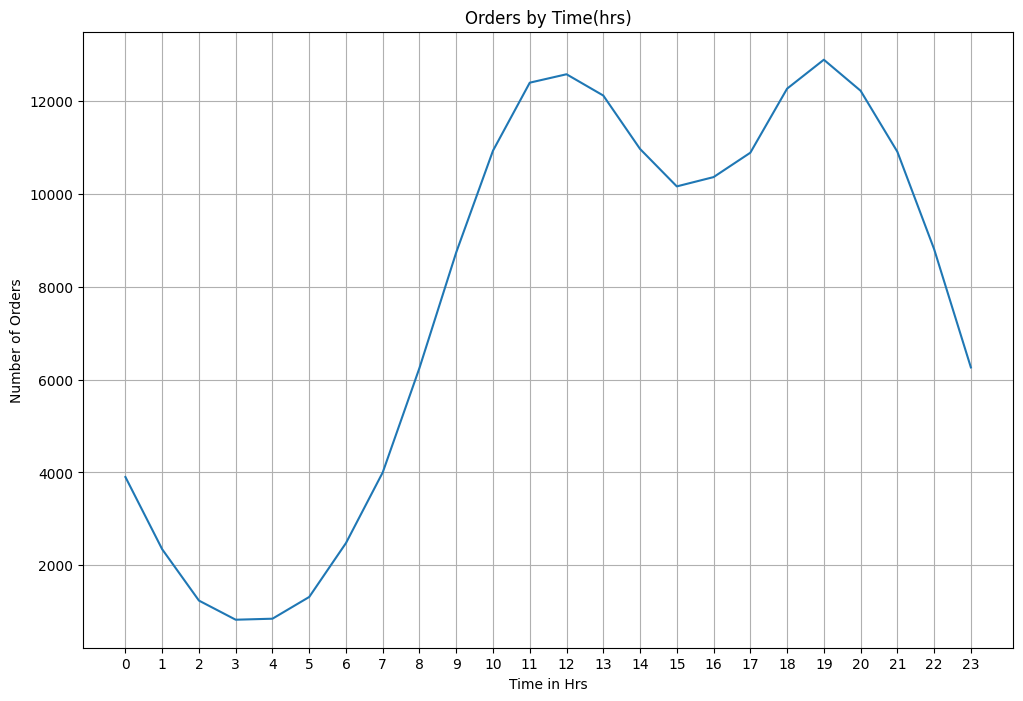

In [30]:
plt.figure(figsize=(12, 8))

# 'df_hour_grouped.index' represents the hours, and 'df_hour_grouped.values' represents the number of orders
plt.plot(df_hour_grouped.index, df_hour_grouped.values)
plt.xlabel('Time in Hrs')
plt.ylabel('Number of Orders')
plt.title('Orders by Time(hrs)')

# Customize x-axis tick marks to match the hours
plt.xticks(range(len(df_hour_grouped.index)))

# Add a grid to the plot for better readability
plt.grid()
plt.show()

Orders only in San Francisco (CA)

In [31]:
city_name = 'San Francisco (CA)'
city_group = df.groupby(['Hour', 'City'])['Quantity Ordered'].count().reset_index()
city_count = city_group[city_group['City'] == city_name]
city_count

,Hour,City,Quantity Ordered
8,0,San Francisco (CA),937
18,1,San Francisco (CA),569
28,2,San Francisco (CA),315
38,3,San Francisco (CA),219
48,4,San Francisco (CA),217
58,5,San Francisco (CA),343
68,6,San Francisco (CA),630
78,7,San Francisco (CA),988
88,8,San Francisco (CA),1471
98,9,San Francisco (CA),2060


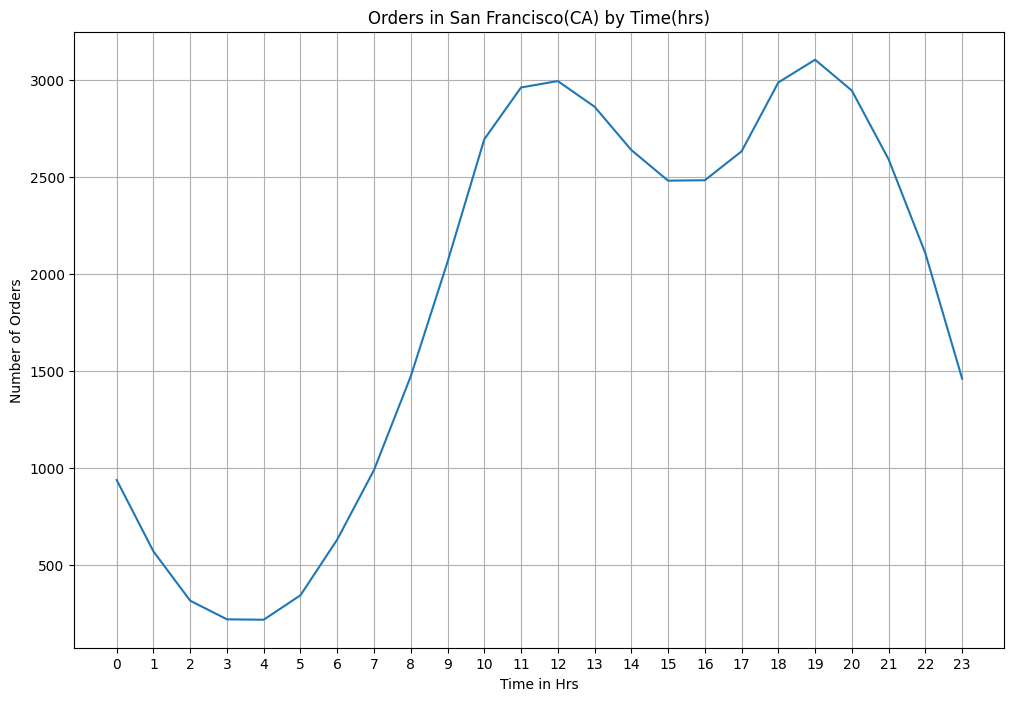

In [32]:
plt.figure(figsize=(12, 8))
plt.plot(city_count['Hour'], city_count['Quantity Ordered'])
plt.xlabel('Time in Hrs')
plt.ylabel('Number of Orders')
plt.title('Orders in San Francisco(CA) by Time(hrs)')
plt.xticks(range(len(city_count['Hour'])))
plt.grid()
plt.show()

Orders in Portland (ME)

In [33]:
city2_name = 'Portland (ME)'
city2_group = df.groupby(['Hour', 'City'])['Quantity Ordered'].count().reset_index()
city2_count = city_group[city2_group['City'] == city2_name]
city2_count

,Hour,City,Quantity Ordered
6,0,Portland (ME),48
16,1,Portland (ME),34
26,2,Portland (ME),14
36,3,Portland (ME),11
46,4,Portland (ME),11
56,5,Portland (ME),14
66,6,Portland (ME),40
76,7,Portland (ME),56
86,8,Portland (ME),83
96,9,Portland (ME),106


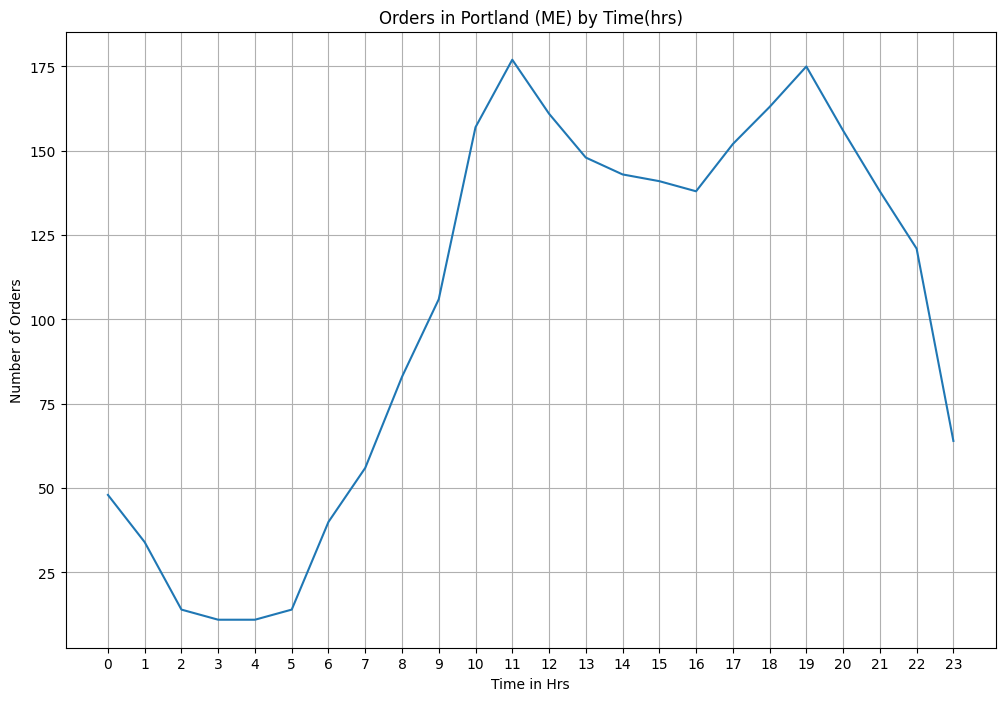

In [34]:
plt.figure(figsize=(12, 8))
plt.plot(city2_count['Hour'], city2_count['Quantity Ordered'])
plt.xlabel('Time in Hrs')
plt.ylabel('Number of Orders')
plt.title('Orders in Portland (ME) by Time(hrs)')
plt.xticks(range(len(city2_count['Hour'])))
plt.grid()
plt.show()

Plotting Quantity Ordered by Hour for Different Cities

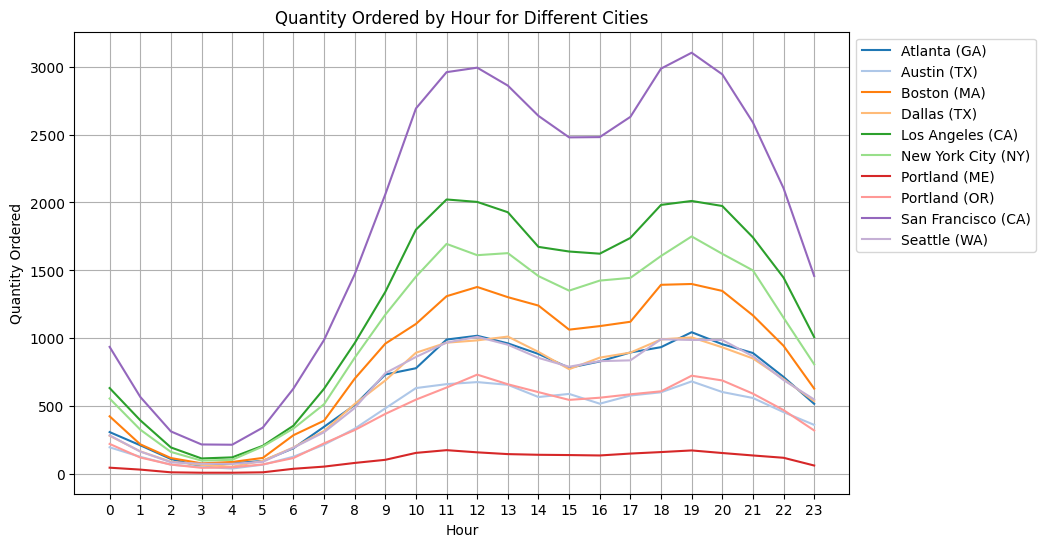

In [35]:
# Group by 'City' and 'Hour', and pivot the data
all_city_group = df.pivot_table(index='Hour', columns='City', values='Quantity Ordered', aggfunc='count')

# Define a color palette for each city
color_palette = plt.cm.tab20.colors

# Create the line graph with different colors for each city
plt.figure(figsize=(10, 6))
for i, city in enumerate(all_city_group.columns):
    plt.plot(all_city_group.index, all_city_group[city], label=city, color=color_palette[i])

# Set labels and title
plt.xlabel('Hour')
plt.ylabel('Quantity Ordered')
plt.title('Quantity Ordered by Hour for Different Cities')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(range(len(all_city_group.index)))
plt.grid()
# Show the plot
plt.show()

### Question 4 : Which products are most frequently sold together?

In [36]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Order_Date_DT,Month_DT,Hour,City,Total_Price
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,2019-05-16 17:14:00,5,17,New York City (NY),11.99
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,2019-05-19 14:43:00,5,14,Dallas (TX),3.84
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,2019-05-24 11:36:00,5,11,New York City (NY),149.99
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,2019-05-02 20:40:00,5,20,Dallas (TX),11.99
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,2019-05-11 22:55:00,5,22,Seattle (WA),5.98


We can see that “Order ID” indicate the transaction. So by grouping the product by the Order ID, we are able to know which products are often sold together. We’re gonna use .duplicated() method to find a duplicate values of “Order ID”.

In [37]:
# where the 'Order ID' column has duplicates and you want to keep all rows with duplicated 'Order ID' values.

df_new=df[df['Order ID'].duplicated(keep=False)]
df_new

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Order_Date_DT,Month_DT,Hour,City,Total_Price
15,194110,Google Phone,1,600.00,05/31/19 18:07,"498 14th St, Los Angeles, CA 90001",5,2019-05-31 18:07:00,5,18,Los Angeles (CA),600.00
16,194110,Wired Headphones,1,11.99,05/31/19 18:07,"498 14th St, Los Angeles, CA 90001",5,2019-05-31 18:07:00,5,18,Los Angeles (CA),11.99
77,194170,Google Phone,1,600.00,05/30/19 12:30,"711 Maple St, San Francisco, CA 94016",5,2019-05-30 12:30:00,5,12,San Francisco (CA),600.00
78,194170,USB-C Charging Cable,2,11.95,05/30/19 12:30,"711 Maple St, San Francisco, CA 94016",5,2019-05-30 12:30:00,5,12,San Francisco (CA),23.90
82,194174,iPhone,1,700.00,05/04/19 23:08,"37 North St, Seattle, WA 98101",5,2019-05-04 23:08:00,5,23,Seattle (WA),700.00
...,...,...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,2019-09-20 20:18:00,9,20,Atlanta (GA),3.84
11639,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,2019-09-16 00:25:00,9,0,Atlanta (GA),11.99
11640,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,2019-09-16 00:25:00,9,0,Atlanta (GA),5.98
11677,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,2019-09-30 13:49:00,9,13,San Francisco (CA),600.00


Now we want to create a column called “Product Bundle” that contain example USB-C Charging Cable,Wired Headphones (Order ID: 141275) at the same line. We’re gonna use the .transform() method to join values from two rows into a single row.

In [38]:
#Grouping the products with same Order ID into a single row ',' separated
df_new['Produts_Grouped'] = df_new.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
df_new.head()

<ipython-input-38-3aef116cfdbc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Produts_Grouped'] = df_new.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Order_Date_DT,Month_DT,Hour,City,Total_Price,Produts_Grouped
15,194110,Google Phone,1,600.00,05/31/19 18:07,"498 14th St, Los Angeles, CA 90001",5,2019-05-31 18:07:00,5,18,Los Angeles (CA),600.00,"Google Phone,Wired Headphones"
16,194110,Wired Headphones,1,11.99,05/31/19 18:07,"498 14th St, Los Angeles, CA 90001",5,2019-05-31 18:07:00,5,18,Los Angeles (CA),11.99,"Google Phone,Wired Headphones"
77,194170,Google Phone,1,600.00,05/30/19 12:30,"711 Maple St, San Francisco, CA 94016",5,2019-05-30 12:30:00,5,12,San Francisco (CA),600.00,"Google Phone,USB-C Charging Cable"
78,194170,USB-C Charging Cable,2,11.95,05/30/19 12:30,"711 Maple St, San Francisco, CA 94016",5,2019-05-30 12:30:00,5,12,San Francisco (CA),23.90,"Google Phone,USB-C Charging Cable"
82,194174,iPhone,1,700.00,05/04/19 23:08,"37 North St, Seattle, WA 98101",5,2019-05-04 23:08:00,5,23,Seattle (WA),700.00,"iPhone,Lightning Charging Cable,Wired Headphones"


It’s good, but we have an issue here. We have the same order at least twice because we did merge them in every situation in groupby without dropping the duplicate values. Now let’s drop the rows with duplicate values.

In [39]:
# Removing duplicate rows with same grouping
df_new_unique_product_groupings = df_new[['Order ID', 'Produts_Grouped']].drop_duplicates()
df_new_unique_product_groupings

,Order ID,Produts_Grouped
15,194110,"Google Phone,Wired Headphones"
77,194170,"Google Phone,USB-C Charging Cable"
82,194174,"iPhone,Lightning Charging Cable,Wired Headphones"
89,194179,"Flatscreen TV,AAA Batteries (4-pack)"
103,194192,"Wired Headphones,Bose SoundSport Headphones"
...,...,...
11597,259277,"iPhone,Wired Headphones"
11619,259297,"iPhone,Lightning Charging Cable"
11627,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,"Wired Headphones,AAA Batteries (4-pack)"


Using itertools and collections libraries, to count the pair of products

In [40]:
# Create an empty Counter object called 'count' to store combinations of products.
count = Counter()

# Iterate through each row in the 'Produts_Grouped' column of 'df_new_unique_product_groupings'.
for row in df_new_unique_product_groupings['Produts_Grouped']:

   # Split the row into a list of products using a comma as the delimiter.
    row_list = row.split(',')

    # Update the 'count' Counter with combinations of two products from the 'row_list'.
    count.update(Counter(combinations(row_list, 2)))

# Print the top 10 most common product combinations along with their counts.
for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [41]:
total_count = sum(count.values())

for key,value in count.most_common(10):

    # Calculate the percentage of the current combination relative to the total count.
    percentage = (value / total_count) * 100

    # Print the combination, count, and percentage.
    print(f"{key}: {value} (Percentage: {percentage:.2f}%)")


('iPhone', 'Lightning Charging Cable'): 1002 (Percentage: 13.12%)
('Google Phone', 'USB-C Charging Cable'): 985 (Percentage: 12.90%)
('iPhone', 'Wired Headphones'): 447 (Percentage: 5.85%)
('Google Phone', 'Wired Headphones'): 413 (Percentage: 5.41%)
('Vareebadd Phone', 'USB-C Charging Cable'): 361 (Percentage: 4.73%)
('iPhone', 'Apple Airpods Headphones'): 360 (Percentage: 4.71%)
('Google Phone', 'Bose SoundSport Headphones'): 220 (Percentage: 2.88%)
('USB-C Charging Cable', 'Wired Headphones'): 159 (Percentage: 2.08%)
('Vareebadd Phone', 'Wired Headphones'): 143 (Percentage: 1.87%)
('Lightning Charging Cable', 'Wired Headphones'): 92 (Percentage: 1.20%)


In [42]:
#Getting unique combinations using value_counts, adding 'normalize=True' gives the percentage
df_new_unique_product_groupings['Produts_Grouped'].value_counts(normalize=True)

iPhone,Lightning Charging Cable                                                           0.128798
Google Phone,USB-C Charging Cable                                                         0.124582
iPhone,Wired Headphones                                                                   0.052479
Vareebadd Phone,USB-C Charging Cable                                                      0.045355
Google Phone,Wired Headphones                                                             0.044047
                                                                                            ...   
Macbook Pro Laptop,Flatscreen TV                                                          0.000145
iPhone,Lightning Charging Cable,Wired Headphones,AA Batteries (4-pack)                    0.000145
Vareebadd Phone,Wired Headphones,27in 4K Gaming Monitor                                   0.000145
iPhone,Lightning Charging Cable,Apple Airpods Headphones,Wired Headphones,Google Phone    0.000145
LG Washing

In [43]:
#Gettting unique combinations using nunique
grouped_counts = df_new_unique_product_groupings.groupby('Produts_Grouped').nunique()

# Access the unique counts as follows:
unique_counts = grouped_counts.iloc[:, 0]  # Assuming the unique counts are in the first column

# Sort the unique counts in descending order
sorted_unique_counts = unique_counts.sort_values(ascending=False)
sorted_unique_counts.head(20)

Produts_Grouped
iPhone,Lightning Charging Cable                       886
Google Phone,USB-C Charging Cable                     857
iPhone,Wired Headphones                               361
Vareebadd Phone,USB-C Charging Cable                  312
Google Phone,Wired Headphones                         303
iPhone,Apple Airpods Headphones                       286
Google Phone,Bose SoundSport Headphones               161
Vareebadd Phone,Wired Headphones                      104
Google Phone,USB-C Charging Cable,Wired Headphones     79
Vareebadd Phone,Bose SoundSport Headphones             60
iPhone,Lightning Charging Cable,Wired Headphones       56
Lightning Charging Cable,USB-C Charging Cable          55
Lightning Charging Cable,AA Batteries (4-pack)         52
AA Batteries (4-pack),Lightning Charging Cable         51
AAA Batteries (4-pack),USB-C Charging Cable            50
AA Batteries (4-pack),AAA Batteries (4-pack)           48
Apple Airpods Headphones,AAA Batteries (4-pack)        4

### Question 5 : Which product had the highest sales, and why do you think it achieved that?

In [44]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Order_Date_DT,Month_DT,Hour,City,Total_Price
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,2019-05-16 17:14:00,5,17,New York City (NY),11.99
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,2019-05-19 14:43:00,5,14,Dallas (TX),3.84
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,2019-05-24 11:36:00,5,11,New York City (NY),149.99
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,2019-05-02 20:40:00,5,20,Dallas (TX),11.99
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,2019-05-11 22:55:00,5,22,Seattle (WA),5.98


In [45]:
#providing an overview of product-specific statistics
df.groupby('Product').sum()

<ipython-input-45-1ec64f917300>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product').sum()


,Quantity Ordered,Price Each,Month,Month_DT,Hour,Total_Price
Product,,,,,,
20in Monitor,4126,450739.02,29319,29319,58729,453818.74
27in 4K Gaming Monitor,6239,2427687.75,44396,44396,90841,2433147.61
27in FHD Monitor,7541,1124625.02,52484,52484,107422,1131074.59
34in Ultrawide Monitor,6192,2346058.26,43258,43258,88957,2352898.08
AA Batteries (4-pack),27615,78942.72,145423,145423,298077,106041.60
AAA Batteries (4-pack),30986,61629.88,146149,146149,296904,92648.14
Apple Airpods Headphones,15637,2328750.00,109304,109304,222938,2345550.00
Bose SoundSport Headphones,13430,1329667.02,93918,93918,192077,1342865.70
Flatscreen TV,4813,1438200.00,34172,34172,68719,1443900.00


In [46]:
df_popular_products=df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=True)
df_popular_products

Product
LG Dryer                        646
LG Washing Machine              666
Vareebadd Phone                2068
20in Monitor                   4126
ThinkPad Laptop                4128
Macbook Pro Laptop             4725
Flatscreen TV                  4813
Google Phone                   5529
34in Ultrawide Monitor         6192
27in 4K Gaming Monitor         6239
iPhone                         6847
27in FHD Monitor               7541
Bose SoundSport Headphones    13430
Apple Airpods Headphones      15637
Wired Headphones              20524
Lightning Charging Cable      23169
USB-C Charging Cable          23931
AA Batteries (4-pack)         27615
AAA Batteries (4-pack)        30986
Name: Quantity Ordered, dtype: int64

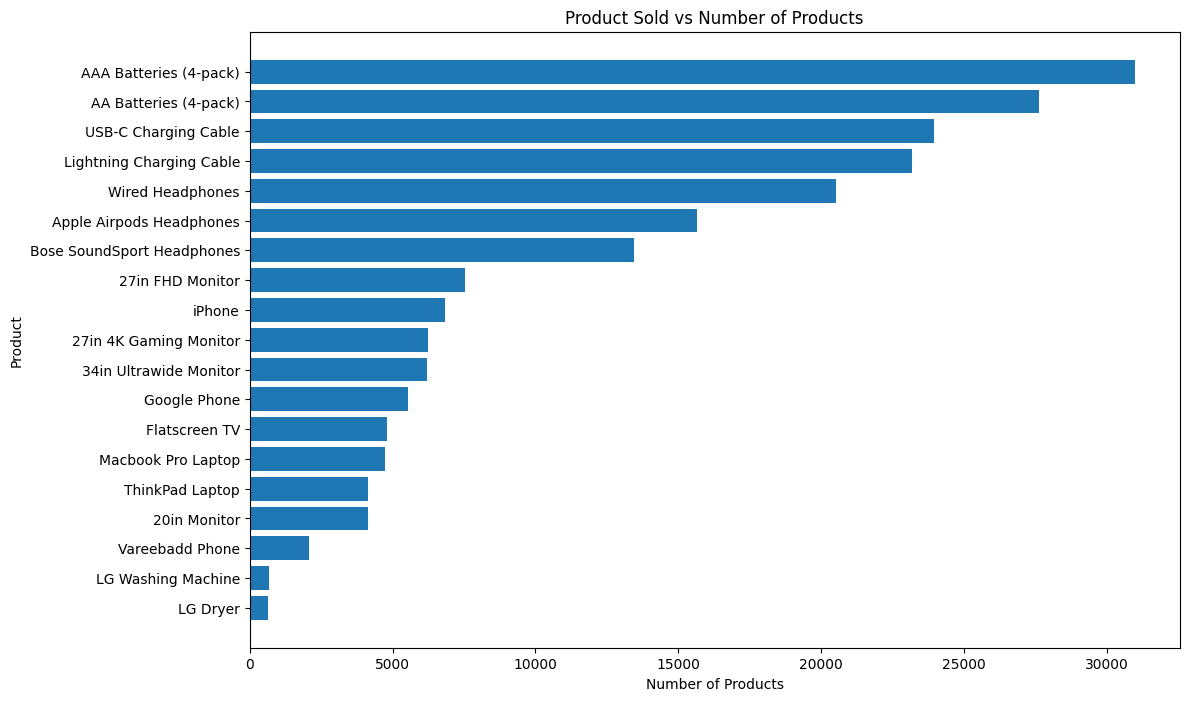

In [47]:
plt.figure(figsize=(12, 8))
plt.barh(df_popular_products.index, df_popular_products.values)
plt.xlabel('Number of Products')
plt.ylabel('Product')
plt.title('Product Sold vs Number of Products')
plt.show()

In [48]:
prices = df.groupby('Product')['Price Each'].mean().sort_values(ascending=True)
prices

Product
AAA Batteries (4-pack)           2.99
AA Batteries (4-pack)            3.84
USB-C Charging Cable            11.95
Wired Headphones                11.99
Lightning Charging Cable        14.95
Bose SoundSport Headphones      99.99
20in Monitor                   109.99
27in FHD Monitor               149.99
Apple Airpods Headphones       150.00
Flatscreen TV                  300.00
34in Ultrawide Monitor         379.99
27in 4K Gaming Monitor         389.99
Vareebadd Phone                400.00
Google Phone                   600.00
LG Washing Machine             600.00
LG Dryer                       600.00
iPhone                         700.00
ThinkPad Laptop                999.99
Macbook Pro Laptop            1700.00
Name: Price Each, dtype: float64

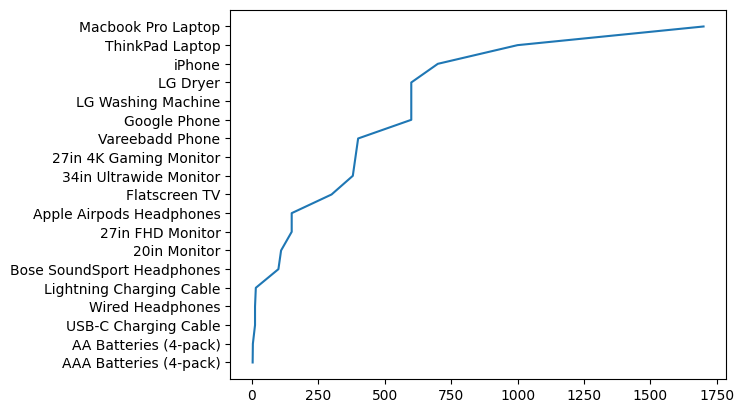

In [49]:
plt.plot(prices.values, prices.index)
plt.show()

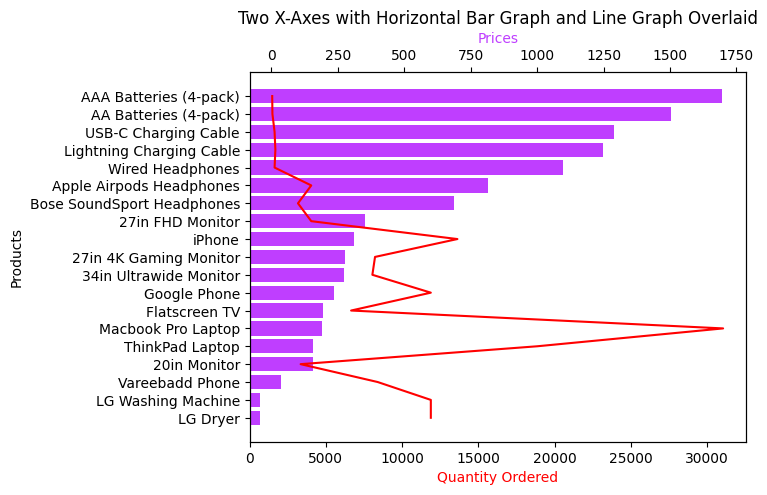

In [50]:
# Create a figure and axis
fig, ax1 = plt.subplots()

# Group and sort the data by quantity ordered for the horizontal bar graph
df_popular_products = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=True)

# Group and sort the data by quantity ordered for the line graph
prices = df.groupby('Product')['Price Each'].mean().loc[df_popular_products.index]

# Plot the horizontal bar graph on the primary axis (ax1)
ax1.barh(df_popular_products.index, df_popular_products.values, color='#BF3EFF')

# Create a twin axis for the x-axis
ax2 = ax1.twiny()

# Plot the line graph on the secondary axis (ax2)
ax2.plot(prices.values, prices.index, color='red')

# Add labels and title
ax1.set_xlabel('Quantity Ordered', color='red')
ax1.set_ylabel('Products')
ax2.set_xlabel('Prices', color='#BF3EFF')
ax1.set_title('Two X-Axes with Horizontal Bar Graph and Line Graph Overlaid')

# Set x-axis tick positions and labels for the horizontal bar graph
ax1.set_yticks(range(len(df_popular_products)))
ax1.set_yticklabels(df_popular_products.index)

# Display the plot
plt.show()


<ipython-input-51-5d974559fa2d>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_popular_products.index, rotation=90, size=8)


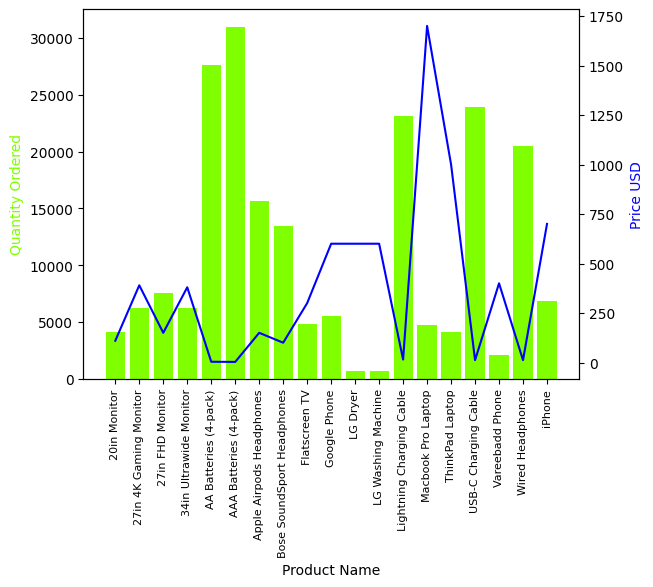

In [51]:
# Create a figure and two axes objects: ax1 and ax2.
fig, ax1 = plt.subplots()

# Group the DataFrame 'df' by 'Product' and calculate the sum of 'Quantity Ordered' for each product.
df_popular_products=df.groupby('Product')['Quantity Ordered'].sum()

# Calculate the mean prices for each product.
prices = df.groupby('Product')['Price Each'].mean()
prices

# Create a twin y-axis (ax2) to overlay on ax1.
ax2 = ax1.twinx()

# Create a bar plot on ax1 for quantity ordered using green color.
ax1.bar(df_popular_products.index, df_popular_products.values, color='#7FFF00')

# Create a line plot on ax2 for product prices using blue color.
ax2.plot(prices.index,prices.values, color='b')

ax1.set_xlabel('Product Name')

# Set the label for the y-axis of ax1 (quantity ordered) and specify the color.
ax1.set_ylabel('Quantity Ordered', color='#7FFF00')

# Set the label for the y-axis of ax2 (product prices) and specify the color.
ax2.set_ylabel('Price USD', color='b')

# Rotate and adjust the size of the x-axis tick labels for better readability.
ax1.set_xticklabels(df_popular_products.index, rotation=90, size=8)

fig.show()

# Conclusion

In this comprehensive analysis of 12 months' worth of sales data, we have successfully addressed the key business questions, providing valuable insights and recommendations that can inform strategic decisions.


**Best Month for Sales:**  
Our analysis reveals that December emerged as the best month for sales, with the company earning approximately $4.6 million during that period. This peak in sales may be attributed to various factors, including holiday shopping trends and promotional campaigns run during the festive season.

**City with Highest Product Sales:**  
San Francisco (California) stands out as the city with the highest product sales. Understanding regional variations in sales performance can guide targeted marketing and inventory management strategies.

**Optimal Advertisement Timing:**  
To maximize the likelihood of customers buying products, we recommend displaying advertisements either shortly before 12 PM or 7 PM, such as at 11:30 AM or 6:30 PM. These time slots coincide with potential peaks in customer engagement and purchase intent.

**Products Frequently Sold Together:**  
Our analysis identified iPhone and Lightning Charging Cable as the most frequently sold together products, with 1002 transactions, accounting for approximately 13% of total items sold together. This insight can guide bundling strategies and promotional offers.

**Top-Selling Product:**  
AAA Batteries (4 pack) emerged as the highest-selling product. This can be attributed to its competitive pricing compared to other products and its consistently high demand. The combination of affordability and utility likely contributed to its sales dominance.

**Recommendations:**  
Based on our findings, we recommend the following actions:

* Leverage the December sales peak by planning targeted holiday promotions and inventory management.
* Allocate additional marketing resources to San Francisco to capitalize on its strong sales potential.
* Schedule advertisements to align with our recommended timings for optimal customer engagement.
* Consider bundling iPhone and Lightning Charging Cable as part of promotional offers.
* Continue to prioritize the stocking and promotion of AAA Batteries (4 pack) due to its popularity and affordability.


**Impact and Future Work:**  
Implementing these recommendations has the potential to enhance sales and customer engagement significantly. In the future, we could explore additional factors influencing sales trends and customer preferences, further refining our strategies for business growth.

**Acknowledgments:**  
We express our gratitude to Pandas and Matplotlib for their indispensable contributions to this analysis.

In summary, this project has provided actionable insights that can drive data-driven decision-making, ultimately leading to improved business performance. We look forward to leveraging these findings to continue our journey toward growth and success.